In [350]:
%run code/import_libs.py
%run code/functions.py
%run code/Build_Forms.py
%run code/initial_data_prep.py

%matplotlib inline


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 30)
pd.options.display.float_format = '{:,}'.format

df['year_of_sale']=df['date'].apply(lambda x: str.split(x,'/')[2]).astype(int)
df['sqft_living_bin']=pd.cut(df['sqft_living'], bins=12)

In [351]:
initial_pred = df.drop(columns=["price"]).copy()
initial_price = df[["price"]]

#FILTER

#df=df[df['yr_built']>1980]
#df=df[df['price']<1000000].copy()
df=df[df['sqft_living']<12000].copy()
#df=df[df['sqft_lot']<1000000].copy()
df=df[~df["grade"].isin([3])]



In [352]:
df['zipcode'].value_counts().head()
np.percentile(df['sqft_living'], 49), np.percentile(df['sqft_living'], 51)
df['grade'].mean()


7.658041627246925

In [353]:
avg_sq_df=df[(df['sqft_living'] >= 1850) & (df['sqft_living'] <= 2050)].copy()

avg_grade_df=df[df['grade'].isin([7,8])]

avg_sq_grade_df=avg_sq_df[avg_sq_df['grade'].isin([7,8])]

avg_sq_zip_df=avg_sq_df[avg_sq_df['zipcode'].isin([98011,98014,98024])]
avg_grade_zip_df=avg_grade_df[avg_grade_df['zipcode'].isin([98011,98014,98024])]


#by_zipcode_df=avg_sq_grade_df.groupby('zipcode').mean().reset_index()[['zipcode','price']].sort_values(by='price', \
#                                                                                                       ascending=False)
#zipcode_best_df=by_zipcode_df.head()
#zipcode_worst_df=by_zipcode_df.tail()

#by_zipcode_df[(by_zipcode_df['price'] == by_zipcode_df.sort_values('price')['price'].quantile(0.50)) ]

avg_grade_zip_df.shape

(248, 30)

In [354]:
by_zipcode_df=df.groupby('zipcode').mean().reset_index()[['zipcode','price','price_per_sqft','waterfront_code']].sort_values(by='price', \
                                                                                                       ascending=False)
by_zipcode_df['price']=by_zipcode_df['price'].round()
by_zipcode_df['price_per_sqft']=by_zipcode_df['price_per_sqft'].round()


KeyError: "['waterfront_code'] not in index"

In [52]:
worst_zipcodes_df=df[df['zipcode'].isin (zipcode_worst_df['zipcode'])].copy()
best_zipcodes_df=df[df['zipcode'].isin (zipcode_best_df['zipcode'])].copy()

In [306]:
by_zipcode_df.shape

(70, 4)

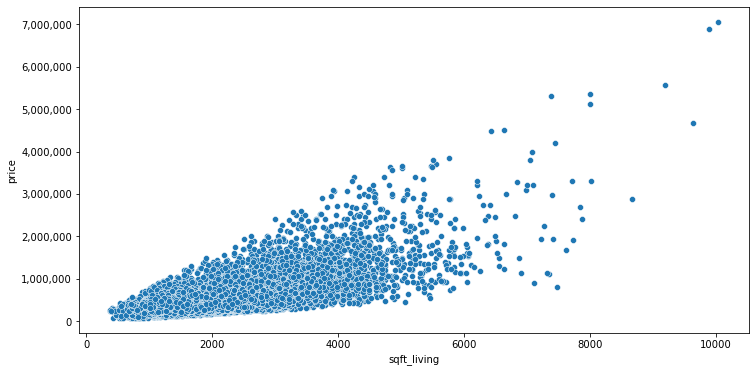

In [54]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot('sqft_living','price', data=df, ax=ax)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

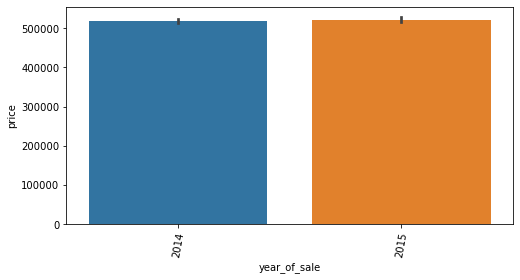

In [132]:

df=df[df['price']<2000000].copy()
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot('year_of_sale','price',  data=df, ax=ax)
plt.xticks(rotation=80);


In [381]:
avg_grade_zip_df[['grade','zipcode']].value_counts()



grade  zipcode
7      98011      82
8      98011      61
7      98014      45
       98024      26
8      98014      20
       98024      14
dtype: int64

In [387]:
pvalue_dic={}
for zipcode_val in by_zipcode_df['zipcode']:
#    avg_sq_zip_df=avg_sq_df[avg_sq_df['zipcode']== zipcode_val]
    avg_grade_zip_df=avg_grade_df[avg_grade_df['zipcode']== zipcode_val]
      
    
    df2=avg_grade_zip_df
#    df2=df
    pvalue_list=[]
    for i in range(100):
        experiment=df2[df2['basement']==1]

        control=df2[df2['basement']!=1] #.sample(n=100)

        #AUTOMATIC FOR 2-T-TEST T-WELCH
        pval=stats.ttest_ind( experiment['price_per_sqft'],control['price_per_sqft'],  equal_var = False, alternative='less')[1] # [alternative='two-sided' is default]

        pvalue_list.append(pval)

    average_pval=sum(pvalue_list)/len(pvalue_list)
    pvalue_dic[zipcode_val]=average_pval
#   print(zipcode_val, '{:.20f}'.format(average_pval))

#np.mean(list(pvalue_dic.values()))




98039 0.06905701293035690358
98004 0.00000000003253142222
98040 0.00147755294789497804
98112 0.00122580992351266609
98109 0.00022939983915008417
98006 0.00000000107534966561
98005 0.00002755537301684900
98105 0.00003884877518334643
98119 0.00000000460089699770
98075 0.29423809234024411730
98102 0.00000449514906555129
98199 0.00001464617162970952
98033 0.01129114038232467351
98077 0.00000044681474909958
98074 0.07253224569272090361
98053 0.00124773105087582284
98052 0.00000934326480117620
98122 0.00000611258489953068
98177 0.00003096378173767900
98007 0.00000236759866415365
98115 0.00000000000005267091
98116 0.00000367269680441938
98029 0.00005666830813651243
98027 0.00000000430294369679
98008 0.00000016290281954851
98103 0.00000003106487644616
98117 0.00000000001328306049
98024 0.02043537142233336004
98072 0.00000971671327443614
98107 0.00000005440427144396
98144 0.00001797631623301709
98136 0.00000377278676360648
98065 0.02679233515352793735
98034 0.00000002511158994130
98011 0.000218

dict_keys([98039, 98004, 98040, 98112, 98109, 98006, 98005, 98105, 98119, 98075, 98102, 98199, 98033, 98077, 98074, 98053, 98052, 98122, 98177, 98007, 98115, 98116, 98029, 98027, 98008, 98103, 98117, 98024, 98072, 98107, 98144, 98136, 98065, 98034, 98011, 98059, 98070, 98028, 98125, 98014, 98166, 98045, 98019, 98126, 98010, 98155, 98118, 98056, 98133, 98038, 98146, 98108, 98058, 98092, 98106, 98022, 98042, 98178, 98055, 98198, 98031, 98003, 98030, 98188, 98148, 98023, 98001, 98032, 98168, 98002])

In [152]:
None     

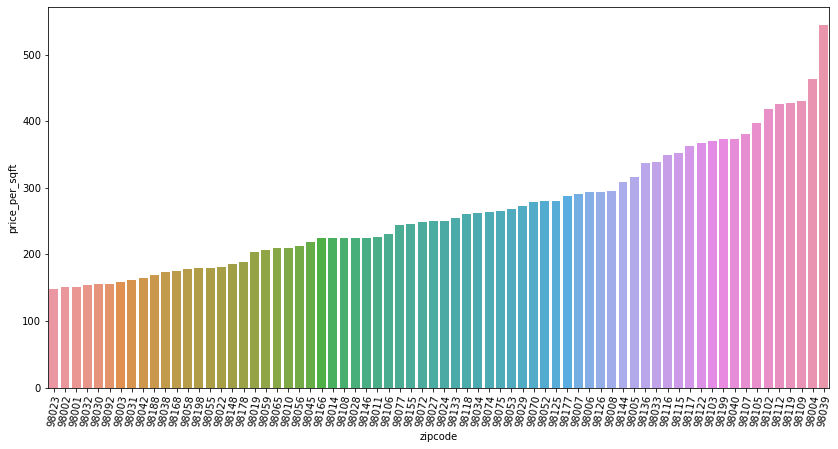

In [153]:

fig, ax = plt.subplots(figsize=(14,7))

plt.xticks(rotation=80);
sns.barplot(x='zipcode', y='price_per_sqft', data=by_zipcode_df,
            order=by_zipcode_df.sort_values('price_per_sqft')['zipcode'])

pd.set_option('display.float_format', lambda x: '%.7f' % x)
#ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.savefig('images/profit_and_roi_by_genre.png')


<AxesSubplot:xlabel='sqft_living_bin', ylabel='price_per_sqft'>

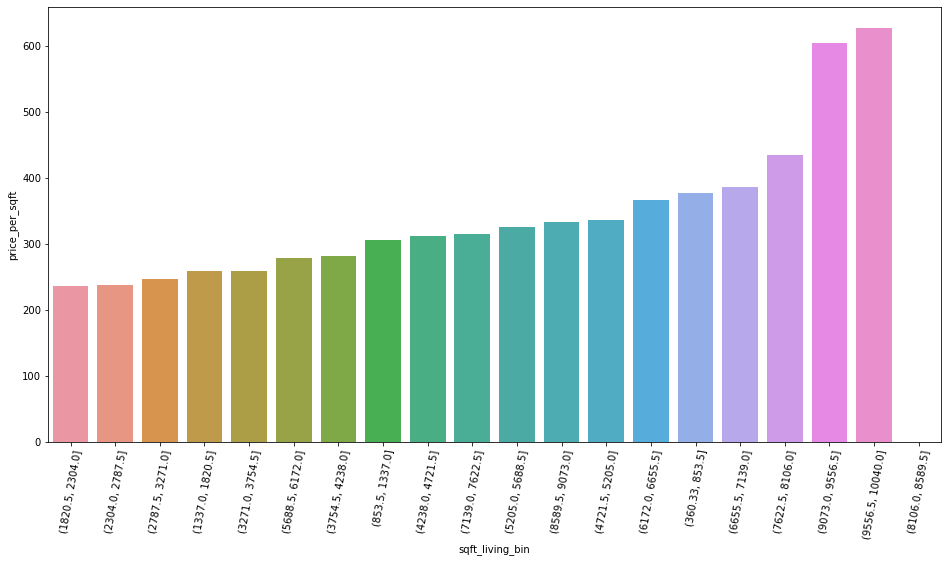

In [111]:
df['sqft_living_bin']=pd.cut(df['sqft_living'], bins=20)
by_sq_living=df.groupby('sqft_living_bin', as_index=False).mean().sort_values(by='price_per_sqft')[['sqft_living_bin','price_per_sqft']].copy()

#by_sql_living['zipcode']=by_zipcode['zipcode'].astype(str)




fig, ax = plt.subplots(figsize=(16,8))

plt.xticks(rotation=80);
sns.barplot(x='sqft_living_bin', y='price_per_sqft', data=by_sq_living,
            order=by_sq_living.sort_values('price_per_sqft')['sqft_living_bin'])





<AxesSubplot:xlabel='sqft_living'>

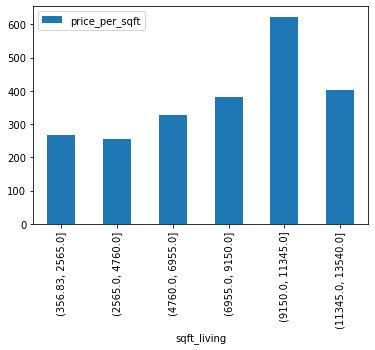

In [106]:
bins=pd.cut(df['sqft_living'], bins=6)
df[['price_per_sqft']].groupby(bins).agg('mean').plot.bar()


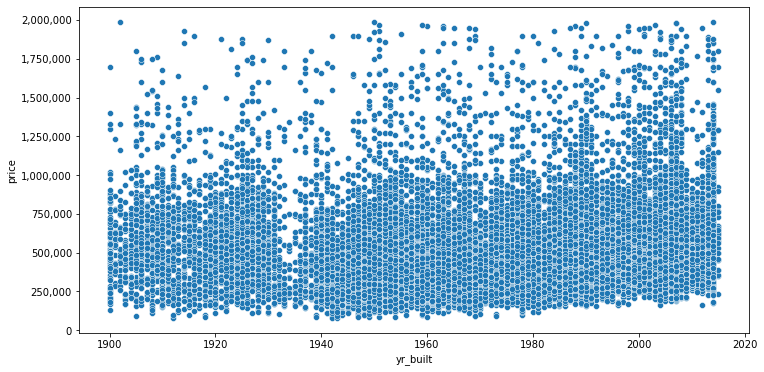

In [12]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot('yr_built','price', data=df, ax=ax)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



In [70]:

df.groupby('year_of_sale').median()['price']

year_of_sale
2014   450,000.0
2015   451,000.0
Name: price, dtype: float64